# 01. Import data & libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/Hempe/Google Drive/17-04-2021 Instacart Basket Analysis'

In [3]:
# Import Data Set df_customers_merge.pkl
df_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customers_merge.pkl'))

In [4]:
df_customers_merge.shape

(32404859, 34)

In [5]:
df_customers_merge.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 02. Security implications

Customer Data: First and last name are PII

# 03. Customer behavior in different geographic areas

In [6]:
# Show all states

df_customers_merge['state'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
# create a new column “region"
result = []

for value in df_customers_merge["state"]:
  if value == "Maine" or value == "New Hampshire" or value == "Vermont" or value == "Massachusetts" or value == "Rhode Island" or value == "Connecticut" or value == "New York" or value == "Pennsylvania" or value == "New Jersey":
    result.append("Region 1")
  elif value == "Wisconsin" or value == "Michigan" or value == "Illinois" or value == "Indiana" or value == "Ohio" or value == "North Dakota" or value == "South Dakota" or value == "Nebraska" or value == "Kansas" or value == "Minnesota" or value == "Iowa" or value == "Missouri":
    result.append("Region 2")
  elif value == "Delaware" or value == "Maryland" or value == "District of Columbia" or value == "Virginia" or value == "West Virginia" or value == "North Carolina" or value == "South Carolina" or value == "Georgia" or value == "Florida" or value == "Kentucky" or value == "Tennessee" or value == "Mississippi" or value == "Alabama" or value == "Oklahoma" or value == "Texas" or value == "Arkansas" or value == "Louisiana":
    result.append("Region 3")
  elif value == "Idaho" or value == "Montana" or value == "Wyoming" or value == "Nevada" or value == "Utah" or value == "Colorado" or value == "Arizona" or value == "New Mexico" or value == "Alaska" or value == "Washington" or value == "Oregon" or value == "California" or value == "Hawaii":
    result.append("Region 4")
  else:
    result.append("Other")

In [8]:
df_customers_merge['region'] = result

In [9]:
df_customers_merge['region'].value_counts(dropna = False)

Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: region, dtype: int64

In [10]:
# Determining whether there’s a difference in spending habits between the different U.S. regions
crosstab = pd.crosstab(df_customers_merge['region'], df_customers_merge['spending_flag'], dropna = False)

In [11]:
# Copying the table straight to clipboard
crosstab.to_clipboard()

In [12]:
# Viewing crosstab
crosstab

spending_flag,High spender,Low spender
region,,
Region 1,108218,5614518
Region 2,155946,7441379
Region 3,209637,10582248
Region 4,160316,8132597


There are no significant differences between all four regions when it comes to spending habits.

# 04. Exclusion flag for low-activity customers

In [13]:
# create a flag that assigns a “low-activity customers” label
df_customers_merge.loc[df_customers_merge['max_order'] < 5, 'activity_flag'] = 'Low-activity'

In [14]:
df_customers_merge.loc[df_customers_merge['max_order'] >= 5, 'activity_flag'] = 'High-activity'

In [15]:
df_customers_merge['activity_flag'].value_counts(dropna = False)

High-activity    30964564
Low-activity      1440295
Name: activity_flag, dtype: int64

In [16]:
# Creating a sample of low-activity customers
df_low_activity_customers = df_customers_merge[df_customers_merge.activity_flag == 'Low-activity']

In [17]:
df_low_activity_customers.shape

(1440295, 36)

In [18]:
# Export df_low_activity_customers
df_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_low_activity_customers.pkl'))

In [19]:
# Creating a sample of high-activity customers
df_high_activity_customers = df_customers_merge[df_customers_merge.activity_flag == 'High-activity']

In [20]:
df_high_activity_customers.shape

(30964564, 36)

In [21]:
# Export df_high_activity_customers
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_high_activity_customers.pkl'))

# 05. Create Parent Status Column

In [22]:
# Import Data Set df_high_activity_customers
df_high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers.pkl'))

In [23]:
# create a parent status column
df_high_activity_customers.loc[(df_high_activity_customers['age'] >= 18) & (df_high_activity_customers['number_of_dependants'] == 0),'parent_status'] = 'Single adult'

In [24]:
df_high_activity_customers.loc[(df_high_activity_customers['age'] >= 18) & (df_high_activity_customers['age'] <= 35) & (df_high_activity_customers['number_of_dependants'] >= 1),'parent_status'] = 'Young age parent'

In [25]:
df_high_activity_customers.loc[(df_high_activity_customers['age'] >= 36) & (df_high_activity_customers['age'] <= 55) & (df_high_activity_customers['number_of_dependants'] >= 1),'parent_status'] = 'Middle age parent'

In [26]:
df_high_activity_customers.loc[(df_high_activity_customers['age'] >= 56) & (df_high_activity_customers['number_of_dependants'] >= 1),'parent_status'] = 'Older age parent'

In [27]:
df_high_activity_customers['parent_status'].value_counts(dropna = False)

Older age parent     9363049
Single adult         7739681
Middle age parent    7300719
Young age parent     6561115
Name: parent_status, dtype: int64

In [28]:
df_high_activity_customers.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,activity_flag,parent_status
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent


# 06. Create income level column

In [29]:
# create income level column
df_high_activity_customers.loc[df_high_activity_customers['income'] < 45000,'income_level'] = 'low income'

In [30]:
df_high_activity_customers.loc[(df_high_activity_customers['income'] >= 45000) & (df_high_activity_customers['income'] < 140000),'income_level'] = 'Middle class'

In [31]:
df_high_activity_customers.loc[(df_high_activity_customers['income'] >= 140000) & (df_high_activity_customers['income'] < 150000),'income_level'] = 'Upper middle class'

In [32]:
df_high_activity_customers.loc[df_high_activity_customers['income'] >= 150000,'income_level'] = 'High income'

In [33]:
df_high_activity_customers['income_level'].value_counts(dropna = False)

Middle class          22805026
High income            3895275
low income             2518783
Upper middle class     1745480
Name: income_level, dtype: int64

In [34]:
df_high_activity_customers.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,age,date_joined,number_of_dependants,family_status,income,_merge,region,activity_flag,parent_status,income_level
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,31,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income


In [35]:
df_high_activity_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404858
Data columns (total 38 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        object  
 2   eval_set                       object  
 3   order_number                   int64   
 4   orders_day_of_week             int64   
 5   order_hour_of_day              int64   
 6   days_since_prior_order         float64 
 7   product_id                     int64   
 8   add_to_cart_order              int64   
 9   reordered                      int64   
 10  product_name                   object  
 11  aisle_id                       int64   
 12  department_id                  int64   
 13  prices                         float64 
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [36]:
df_high_activity_customers['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [37]:
# Import Data Set departments.csv
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [38]:
df_departments.head(5)

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [39]:
# Transposing df_departments
df_departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


# 07. Create Pet Owner Column

In [40]:
# create pet order flag
df_high_activity_customers.loc[df_high_activity_customers['department_id'] == 8,'pet_order_flag'] = 1

In [41]:
df_high_activity_customers.loc[df_high_activity_customers['department_id'] != 8,'pet_order_flag'] = 0

In [42]:
df_high_activity_customers['pet_order_flag'].value_counts(dropna = False)

0.0    30871504
1.0       93060
Name: pet_order_flag, dtype: int64

In [43]:
df_high_activity_customers.head(10)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependants,family_status,income,_merge,region,activity_flag,parent_status,income_level,pet_order_flag
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
5,3367565,1,prior,6,2,7,19.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
6,550135,1,prior,7,1,9,20.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
7,3108588,1,prior,8,1,14,14.00000,196,2,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
8,2295261,1,prior,9,1,16,0.00000,196,4,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0
9,2550362,1,prior,10,4,8,30.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0


In [44]:
# create “max_pet_order” column
df_high_activity_customers['max_pet_order'] = df_high_activity_customers.groupby(['user_id'])['pet_order_flag'].transform(np.max)

In [45]:
df_high_activity_customers.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,number_of_dependants,family_status,income,_merge,region,activity_flag,parent_status,income_level,pet_order_flag,max_pet_order
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,3,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0


In [46]:
# create pet owner column
df_high_activity_customers.loc[(df_high_activity_customers['max_pet_order'] == 0), 'pet_owner'] = "No pet owner"

In [47]:
df_high_activity_customers.loc[(df_high_activity_customers['max_pet_order'] >= 1), 'pet_owner'] = "Pet owner"

In [48]:
df_high_activity_customers['pet_owner'].value_counts(dropna = False)

No pet owner    27513213
Pet owner        3451351
Name: pet_owner, dtype: int64

In [49]:
df_high_activity_customers.head(10)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,family_status,income,_merge,region,activity_flag,parent_status,income_level,pet_order_flag,max_pet_order,pet_owner
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
5,3367565,1,prior,6,2,7,19.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
6,550135,1,prior,7,1,9,20.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
7,3108588,1,prior,8,1,14,14.00000,196,2,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
8,2295261,1,prior,9,1,16,0.00000,196,4,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner
9,2550362,1,prior,10,4,8,30.00000,196,1,1,...,married,40423,both,Region 3,High-activity,Young age parent,low income,0.0,0.0,No pet owner


In [50]:
# Drop pet_order_flag & max_pet_order
df_high_activity_customers = df_high_activity_customers.drop(columns =['pet_order_flag','max_pet_order'])

In [51]:
df_high_activity_customers.head(5)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependants,family_status,income,_merge,region,activity_flag,parent_status,income_level,pet_owner
0,2539329,1,prior,1,2,8,11.11484,196,1,0,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,No pet owner
1,2398795,1,prior,2,3,7,15.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,No pet owner
2,473747,1,prior,3,3,12,21.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,No pet owner
3,2254736,1,prior,4,4,7,29.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,No pet owner
4,431534,1,prior,5,4,15,28.00000,196,1,1,...,2/17/2019,3,married,40423,both,Region 3,High-activity,Young age parent,low income,No pet owner


In [52]:
# Drop eval_set & _merge
df_high_activity_customers = df_high_activity_customers.drop(columns =['eval_set','_merge'])

In [53]:
df_high_activity_customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,family_status,income,region,activity_flag,parent_status,income_level,pet_owner
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,31,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner


# 08. Create baby household column

In [54]:
# create baby order flag
df_high_activity_customers.loc[df_high_activity_customers['department_id'] == 18,'baby_order_flag'] = 1

In [55]:
df_high_activity_customers.loc[df_high_activity_customers['department_id'] != 18,'baby_order_flag'] = 0

In [56]:
df_high_activity_customers['baby_order_flag'].value_counts(dropna = False)

0.0    30554172
1.0      410392
Name: baby_order_flag, dtype: int64

In [57]:
df_high_activity_customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,family_status,income,region,activity_flag,parent_status,income_level,pet_owner,baby_order_flag
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0


In [58]:
# Export df_high_activity_customers_new
df_high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_high_activity_customers_new.pkl'))

In [59]:
# Import Data Set df_high_activity_customers_new.pkl
df_high_activity_customers_new = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_new.pkl'))

In [60]:
# create “max_baby_order” column
df_high_activity_customers_new['max_baby_order'] = df_high_activity_customers.groupby(['user_id'])['baby_order_flag'].transform(np.max)

In [61]:
df_high_activity_customers_new.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependants,family_status,income,region,activity_flag,parent_status,income_level,pet_owner,baby_order_flag,max_baby_order
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0,0.0
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0,0.0
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0,0.0
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0,0.0
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,0.0,0.0


In [62]:
# create baby household column
df_high_activity_customers_new.loc[(df_high_activity_customers_new['max_baby_order'] == 0), 'baby_household'] = "No baby household"

In [63]:
df_high_activity_customers_new.loc[(df_high_activity_customers_new['max_baby_order'] >= 1), 'baby_household'] = "Baby household"

In [64]:
df_high_activity_customers_new['baby_household'].value_counts(dropna = False)

No baby household    21154311
Baby household        9810253
Name: baby_household, dtype: int64

In [65]:
# Drop baby_order_flag & max_baby_order
df_high_activity_customers_new = df_high_activity_customers_new.drop(columns =['baby_order_flag','max_baby_order'])

In [66]:
df_high_activity_customers_new.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,family_status,income,region,activity_flag,parent_status,income_level,pet_owner,baby_household
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household


# 09. Create an appropriate visualization to show the distribution of profiles

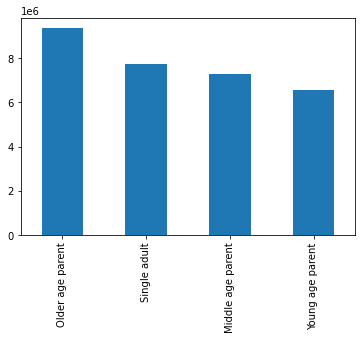

In [67]:
# Create Bar Chart for parent_status

bar_parent_status = df_high_activity_customers_new['parent_status'].value_counts().plot.bar()

In [68]:
bar_parent_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_status.png'))

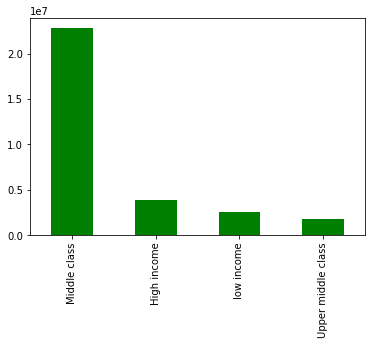

In [69]:
# Create Bar Chart for income_level
bar_income_level = df_high_activity_customers_new['income_level'].value_counts().plot.bar(color = ['green'])

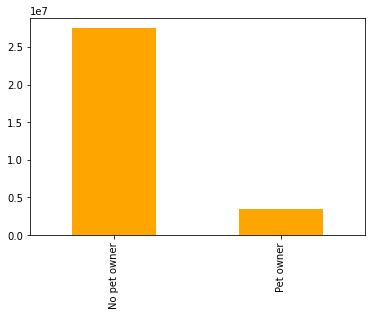

In [70]:
# Create Bar Chart for pet_owner
bar_pet_owner = df_high_activity_customers_new['pet_owner'].value_counts().plot.bar(color = ['orange'])

In [71]:
bar_pet_owner.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner.png'))

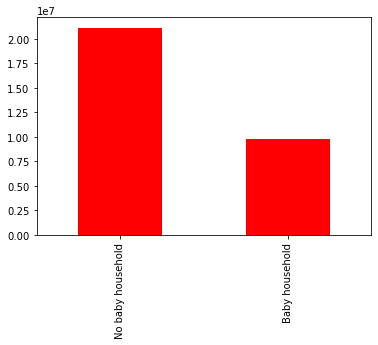

In [72]:
# Create Bar Chart for baby_household
bar_baby_household = df_high_activity_customers_new['baby_household'].value_counts().plot.bar(color = ['red'])

In [73]:
bar_baby_household.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household.png'))

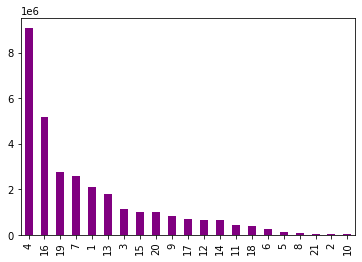

In [141]:
# Create Bar Chart for department
bar_department = df_high_activity_customers_new['department_id'].value_counts().plot.bar(color = ['purple'])

# 10. Aggregate the max, mean, and min variables on a customer-profile level

In [74]:
# Do people with higher income order more than people with less income? 
df_high_activity_customers_new.groupby('income_level').agg({'max_order': ['mean','median', 'min', 'max']})

max_order               
                         mean median min max
income_level                                
High income         34.845446     28   5  99
Middle class        34.585722     28   5  99
Upper middle class  34.411731     27   5  99
low income          32.337259     25   5  99

No, it's nearly on the same level for all different income_level groups

In [75]:
# is there a correlation between family status and income?
df_high_activity_customers_new.groupby('family_status').agg({'income': ['mean','median', 'min', 'max']})

income                       
                                           mean  median    min     max
family_status                                                         
divorced/widowed                  115969.768975  116145  29011  578251
living with parents and siblings   70870.404339   69977  25937  396364
married                           101559.437850   99023  25911  593901
single                             91550.918195   85560  25903  584097

It is interesting to see that people who are divorced/widowed have in average the highest income, higher than people who are married.

In [76]:
# Do older parents have a higher income than younger ones or singles? 
df_high_activity_customers_new.groupby('parent_status').agg({'income': ['mean','median', 'min', 'max']})

income                       
                            mean  median    min     max
parent_status                                          
Middle age parent  104627.052303  103020  25941  592409
Older age parent   115968.075849  116135  29001  593901
Single adult        99896.801937   96982  25903  584097
Young age parent    70656.106347   69204  25911  396364

Older age parents have a higher income on average than young age parents or even single adults.

In [77]:
# Do specific ages tend to be pet owners?

df_high_activity_customers_new.groupby('pet_owner').agg({'age':['mean','median','min', 'max']})

age               
                   mean median min max
pet_owner                             
No pet owner  49.443673     49  18  81
Pet owner     49.662160     50  18  81

There is not a correlation between age and people who own a pet

In [78]:
# Is there a correlation between income and pet owners?
df_high_activity_customers_new.groupby('pet_owner').agg({'income':['mean','median','min', 'max']})

income                      
                       mean median    min     max
pet_owner                                        
No pet owner   99037.417416  96444  25903  593901
Pet owner     104765.393040  99437  26256  591089

There is not a correlation between income and people who own a pet

In [79]:
# Who orders more, female or male?
df_high_activity_customers_new.groupby('gender').agg({'max_order': ['mean','median', 'min', 'max']})

max_order               
             mean median min max
gender                          
Female  34.580885     28   5  99
Male    34.272571     28   5  99

There is no difference between female and male when it comes to maximum orders.

# 11. Compare customer profiles with regions and departments

In [80]:
# Create a new df with the data we really need for this task

df_customer_profile = df_high_activity_customers_new[['user_id', 'region', 'department_id', 'parent_status', 'income_level', 'pet_owner', 'baby_household']]

In [81]:
df_customer_profile.shape

(30964564, 7)

In [82]:
df_customer_profile.head(5)

,user_id,region,department_id,parent_status,income_level,pet_owner,baby_household
0,1,Region 3,7,Young age parent,low income,No pet owner,No baby household
1,1,Region 3,7,Young age parent,low income,No pet owner,No baby household
2,1,Region 3,7,Young age parent,low income,No pet owner,No baby household
3,1,Region 3,7,Young age parent,low income,No pet owner,No baby household
4,1,Region 3,7,Young age parent,low income,No pet owner,No baby household


In [83]:
# Export df_customer_profile
df_customer_profile.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_customer_profile.pkl'))

In [84]:
# Parent status per region
df_parent_status_region = df_customer_profile.groupby(['parent_status','region']).agg({'user_id':['nunique']})

In [85]:
df_parent_status_region

user_id
                           nunique
parent_status     region          
Middle age parent Region 1    6760
                  Region 2    9109
                  Region 3   12656
                  Region 4    9682
Older age parent  Region 1    8688
                  Region 2   11691
                  Region 3   16557
                  Region 4   12600
Single adult      Region 1    7255
                  Region 2    9566
                  Region 3   13537
                  Region 4   10369
Young age parent  Region 1    5878
                  Region 2    8010
                  Region 3   11443
                  Region 4    8830

In [125]:
# parent_status by region
crosstab_parent_status_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['parent_status'], dropna = False)

In [126]:
# Copying the table straight to clipboard
crosstab_parent_status_region.to_clipboard()

In [127]:
crosstab_parent_status_region

parent_status,Middle age parent,Older age parent,Single adult,Young age parent
region,,,,
Region 1,1283257,1672875,1354482,1154071
Region 2,1735091,2176749,1822816,1526857
Region 3,2412260,3110431,2581933,2206515
Region 4,1870111,2402994,1980450,1673672


In [86]:
# income level per region
df_income_level_region = df_customer_profile.groupby(['income_level','region']).agg({'user_id':['nunique']})

In [87]:
df_income_level_region

user_id
                            nunique
income_level       region          
High income        Region 1    3324
                   Region 2    4449
                   Region 3    6266
                   Region 4    4874
Middle class       Region 1   20239
                   Region 2   27352
                   Region 3   38682
                   Region 4   29415
Upper middle class Region 1    1602
                   Region 2    2108
                   Region 3    2811
                   Region 4    2224
low income         Region 1    3416
                   Region 2    4467
                   Region 3    6434
                   Region 4    4968

In [129]:
# income_level by region
crosstab_income_level_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['income_level'], dropna = False)

In [130]:
# Copying the table straight to clipboard
crosstab_income_level_region.to_clipboard()

In [131]:
crosstab_income_level_region

income_level,High income,Middle class,Upper middle class,low income
region,,,,
Region 1,677730,4015280,325507,446168
Region 2,917495,5348796,422576,572646
Region 3,1290460,7609946,555923,854810
Region 4,1009590,5831004,441474,645159


In [88]:
# Pet owner per region
df_pet_owner_region = df_customer_profile.groupby(['pet_owner','region']).agg({'user_id':['nunique']})

In [89]:
df_pet_owner_region

user_id
                      nunique
pet_owner    region          
No pet owner Region 1   26282
             Region 2   35263
             Region 3   49868
             Region 4   38043
Pet owner    Region 1    2299
             Region 2    3113
             Region 3    4325
             Region 4    3438

In [133]:
# pet_owner by region
crosstab_pet_owner_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['pet_owner'], dropna = False)

In [134]:
# Copying the table straight to clipboard
crosstab_pet_owner_region.to_clipboard()

In [135]:
crosstab_pet_owner_region

pet_owner,No pet owner,Pet owner
region,,
Region 1,4866501,598184
Region 2,6433992,827521
Region 3,9193489,1117650
Region 4,7019231,907996


In [90]:
# Baby household per region
df_baby_household_region = df_customer_profile.groupby(['baby_household','region']).agg({'user_id':['nunique']})

In [91]:
df_baby_household_region

user_id
                           nunique
baby_household    region          
Baby household    Region 1    5325
                  Region 2    7205
                  Region 3   10053
                  Region 4    7647
No baby household Region 1   23256
                  Region 2   31171
                  Region 3   44140
                  Region 4   33834

In [137]:
# baby_household by region
crosstab_baby_household_region = pd.crosstab(df_customer_profile['region'], df_customer_profile['baby_household'], dropna = False)

In [138]:
# Copying the table straight to clipboard
crosstab_baby_household_region.to_clipboard()

In [139]:
crosstab_baby_household_region

baby_household,Baby household,No baby household
region,,
Region 1,1749079,3715606
Region 2,2303281,4958232
Region 3,3270454,7040685
Region 4,2487439,5439788


In [92]:
# parent_status by department
crosstab_parent_status_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['parent_status'], dropna = False)

In [93]:
# Copying the table straight to clipboard
crosstab_parent_status_department.to_clipboard()

In [94]:
crosstab_parent_status_department

parent_status,Middle age parent,Older age parent,Single adult,Young age parent
department_id,,,,
1,499277,642453,529348,450653
2,8006,10286,8714,7405
3,263668,338684,281395,237081
4,2140977,2745819,2275441,1917036
5,32565,43093,36827,32142
6,60740,76479,64461,54311
7,605134,785271,645341,536155
8,21019,28794,23602,19645
9,194792,248550,204296,174498


In [95]:
# income_level by department
crosstab_income_level_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['income_level'], dropna = False)

In [96]:
# Copying the table straight to clipboard
crosstab_income_level_department.to_clipboard()

In [97]:
crosstab_income_level_department

income_level,High income,Middle class,Upper middle class,low income
department_id,,,,
1,276434,1564705,119560,161032
2,4554,25019,1869,2969
3,148444,829586,64545,78253
4,1134852,6811954,523674,608793
5,24067,99491,7607,13462
6,32824,192212,15047,15908
7,313379,1829586,136778,292158
8,12991,67821,5397,6851
9,106350,620054,48412,47320


In [98]:
# pet_owner by department
crosstab_pet_owner_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['pet_owner'], dropna = False)

In [99]:
# Copying the table straight to clipboard
crosstab_pet_owner_department.to_clipboard()

In [100]:
crosstab_pet_owner_department

pet_owner,No pet owner,Pet owner
department_id,,
1,1841935,279796
2,29218,5193
3,983073,137755
4,8309659,769614
5,118075,26552
6,225074,30917
7,2252549,319352
8,0,93060
9,721902,100234


In [101]:
# baby_household by department
crosstab_baby_household_department = pd.crosstab(df_customer_profile['department_id'], df_customer_profile['baby_household'], dropna = False)

In [102]:
# Copying the table straight to clipboard
crosstab_baby_household_department.to_clipboard()

In [103]:
crosstab_baby_household_department

baby_household,Baby household,No baby household
department_id,,
1,678739,1442992
2,11410,23001
3,365689,755139
4,2790574,6288699
5,21181,123446
6,75948,180043
7,650851,1921050
8,23738,69322
9,291474,530662


# 12. Produce suitable charts to illustrate your results

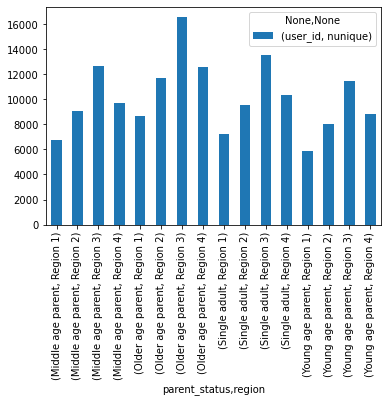

In [104]:
# Create Bar Chart for parent_status per reagion

bar_parent_status_region = df_parent_status_region.plot.bar()

In [105]:
# Export bar chart parent_status_region
bar_parent_status_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_status_region.png'))

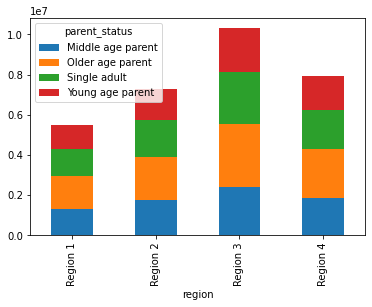

In [128]:
# Create stacked bar chart for parent_status per region

stacked_bar_parent_status_region = crosstab_parent_status_region.plot.bar(stacked= True)

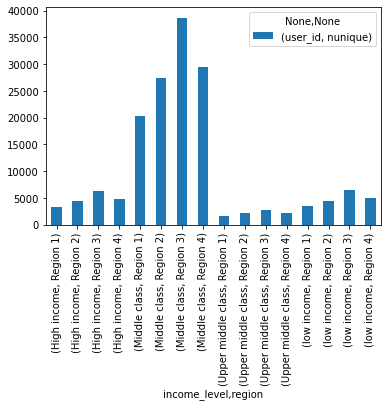

In [106]:
# Create Bar Chart for income_level per reagion

bar_income_level_region = df_income_level_region.plot.bar()

In [107]:
# Export bar chart income_level per region
bar_income_level_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_level_region.png'))

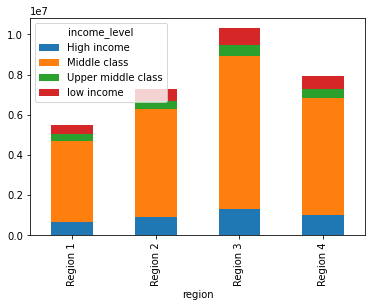

In [132]:
# Create stacked bar chart for income_level per region

stacked_bar_income_level_region = crosstab_income_level_region.plot.bar(stacked= True)

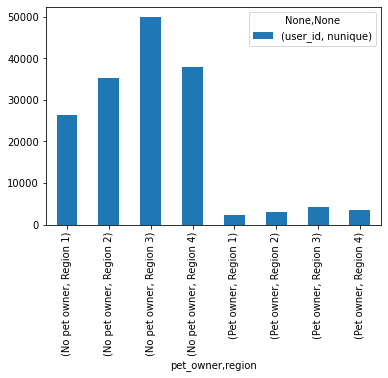

In [108]:
# Create Bar Chart for pet_owner per reagion

bar_pet_owner_region = df_pet_owner_region.plot.bar()

In [109]:
# Export bar chart pet_owner per region
bar_pet_owner_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner_region.png'))

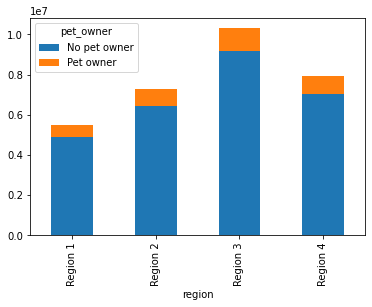

In [136]:
# Create stacked bar chart for pet_owner per region

stacked_pet_owner_level_region = crosstab_pet_owner_region.plot.bar(stacked= True)

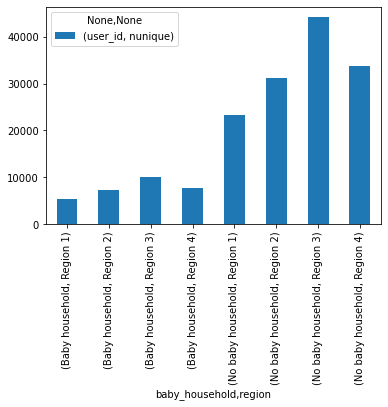

In [110]:
# Create Bar Chart for baby_household per reagion

bar_baby_household_region = df_baby_household_region.plot.bar()

In [111]:
# Export bar chart pet_owner per region
bar_pet_owner_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner_region.png'))

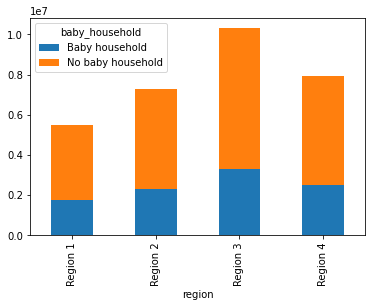

In [140]:
# Create stacked bar chart for baby_household per region

stacked_baby_household_region = crosstab_baby_household_region.plot.bar(stacked= True)

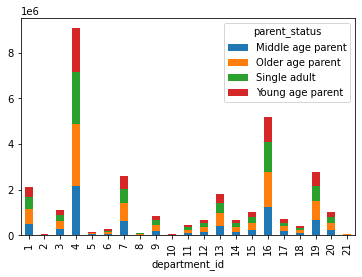

In [112]:
# Create stacked bar chart for parent_status per department

stacked_bar_parent_status_department = crosstab_parent_status_department.plot.bar(stacked= True)

In [113]:
# Export stacked bar chart for parent_status per department
stacked_bar_parent_status_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_parent_status_department.png'))

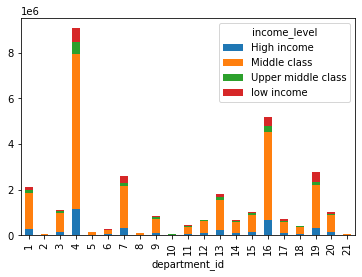

In [114]:
# Create stacked bar chart for income_level per department

stacked_bar_income_level_department = crosstab_income_level_department.plot.bar(stacked= True)

In [115]:
# Export stacked bar chart for income_level per department
stacked_bar_income_level_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_income_level_department.png'))

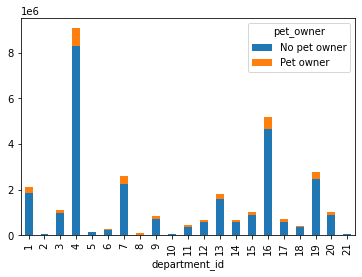

In [116]:
# Create stacked bar chart for pet_owner per department

stacked_bar_pet_owner_department = crosstab_pet_owner_department.plot.bar(stacked= True)

In [117]:
# Export stacked bar chart for pet_owner per department
stacked_bar_pet_owner_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_pet_owner_department.png'))

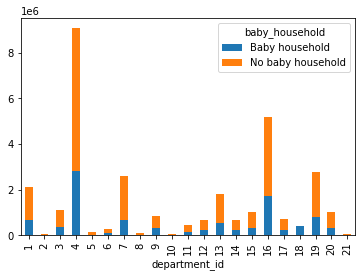

In [118]:
# Create stacked bar chart for baby_household per department

stacked_bar_baby_household_department = crosstab_baby_household_department.plot.bar(stacked= True)

In [119]:
# Export stacked bar chart for baby_household per department
stacked_bar_baby_household_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_baby_household_department.png'))

# 13. Drop first_name & surname columns

In [120]:
# Import Data Set df_high_activity_customers_new_update.pkl
df_high_activity_customers_new_update = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_new_update.pkl'))

In [121]:
# Drop first_name & surname
df_high_activity_customers_new_update = df_high_activity_customers_new_update.drop(columns =['first_name','surname'])

KeyError: "['first_name' 'surname'] not found in axis"

In [122]:
df_high_activity_customers_new_update.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,number_of_dependants,family_status,income,region,activity_flag,parent_status,income_level,pet_owner,baby_household
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,2/17/2019,3,married,40423,Region 3,High-activity,Young age parent,low income,No pet owner,No baby household


# 14. Export Data

In [123]:
# Export df_high_activity_customers_new_update
df_high_activity_customers_new_update.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_high_activity_customers_new_update.pkl'))

# Addition to 10.

In [143]:
df_high_activity_customers_new_update.groupby('loyalty_flag').agg({'orders_day_of_week': ['mean', 'median']})

orders_day_of_week       
                               mean median
loyalty_flag                              
Loyal customer             2.791642      3
New customer               2.701337      2
Regular customer           2.720970      2

In [144]:
df_high_activity_customers_new_update.groupby('loyalty_flag').agg({'order_hour_of_day': ['mean', 'median']})

order_hour_of_day       
                              mean median
loyalty_flag                             
Loyal customer           13.188346     13
New customer             13.657060     14
Regular customer         13.480738     13

In [149]:
df_high_activity_customers_new_update.groupby('region').agg({'orders_day_of_week': ['mean', 'median']})

orders_day_of_week       
                       mean median
region                            
Region 1           2.737948      3
Region 2           2.741556      3
Region 3           2.743692      3
Region 4           2.740643      3

In [150]:
df_high_activity_customers_new_update.groupby('region').agg({'order_hour_of_day': ['mean', 'median']})

order_hour_of_day       
                      mean median
region                           
Region 1         13.410177     13
Region 2         13.429114     13
Region 3         13.403529     13
Region 4         13.404618     13

In [151]:
df_high_activity_customers_new_update.groupby('region').agg({'prices': ['mean', 'median']})

prices       
               mean median
region                    
Region 1  11.542582    7.4
Region 2  12.681835    7.4
Region 3  12.118845    7.4
Region 4  11.276491    7.4

In [152]:
df_high_activity_customers_new_update.groupby('parent_status').agg({'order_hour_of_day': ['mean', 'median']})

order_hour_of_day       
                               mean median
parent_status                             
Middle age parent         13.420762     13
Older age parent          13.410204     13
Single adult              13.421183     13
Young age parent          13.389173     13

In [153]:
df_high_activity_customers_new_update.groupby('parent_status').agg({'orders_day_of_week': ['mean', 'median']})

orders_day_of_week       
                                mean median
parent_status                              
Middle age parent           2.747100      3
Older age parent            2.744806      3
Single adult                2.736253      3
Young age parent            2.736252      3

In [154]:
df_high_activity_customers_new_update.groupby('parent_status').agg({'prices': ['mean', 'median']})

prices       
                        mean median
parent_status                      
Middle age parent  11.533126    7.4
Older age parent   12.040112    7.4
Single adult       12.102657    7.4
Young age parent   12.027423    7.4